# Data visualization of Chess dataset

In [506]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('YlGn_r')

In [507]:
data = pd.read_csv("games.csv")
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [508]:
data['created_at'] = pd.to_datetime(data['created_at'], unit='ms')
data['last_move_at'] = pd.to_datetime(data['last_move_at'], unit='ms')

## Hypotesis 1

Text(0.5, 1.0, 'Bar plot of winners')

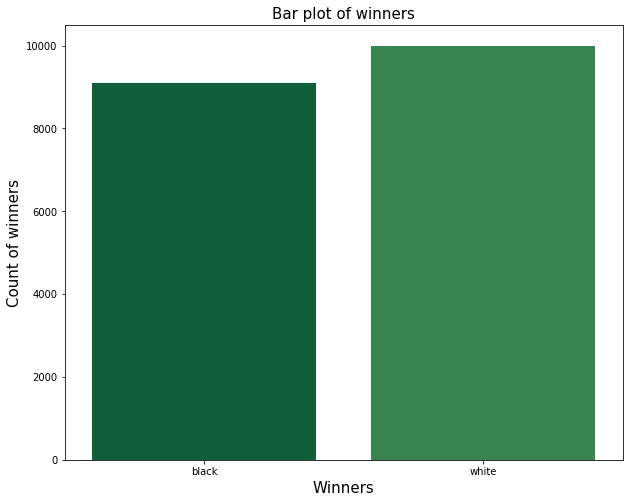

In [509]:
data1 = data.groupby("winner").size().reset_index(name='counts')
data1 = data1.drop(data1.index[1])
plt.figure(figsize=(10, 8))
sns.barplot(data1["winner"],data1["counts"])
plt.xlabel("Winners", size = 15)
plt.ylabel("Count of winners",size = 15)
plt.title("Bar plot of winners",size = 15)

I removed "draw" from my bar plot, to see the difference better between black and white. So we can see that the players with white pieces has an advantage as they are the one who starts the game and makes the first  move.

## Hypotesis 2

In [510]:
data["number_of_moves"] = data["moves"].str.len()

Text(0.5, 1.0, 'Boxplot for number of moves')

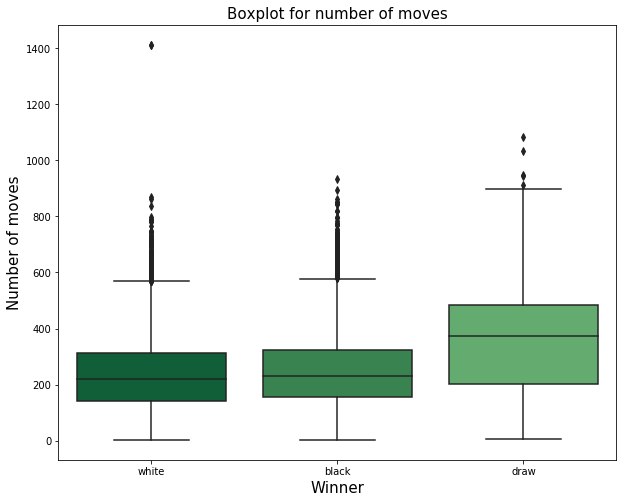

In [511]:
plt.figure(figsize=(10, 8))
plot = sns.boxplot(data["winner"],data["number_of_moves"])
plot.set_xlabel('Winner',fontsize = 15)
plot.set_ylabel('Number of moves',fontsize = 15)
plot.set_title('Boxplot for number of moves',fontsize = 15)

We can see that there is no difference in winners(black , white) and the mean of number of moves for draw is higher than for black or white. We can say that the game, whose number of moves is high is more likely to end with draw.

## Hypotesis 3

In [512]:
data["opening_name"].unique()

array(['Slav Defense: Exchange Variation',
       'Nimzowitsch Defense: Kennedy Variation',
       "King's Pawn Game: Leonardis Variation", ...,
       "Queen's Indian Defense: Classical Variation |  Traditional Variation",
       "Queen's Gambit Declined: Slav |  Dutch Variation",
       'Sicilian Defense: Najdorf Variation |  Polugaevsky Variation'],
      dtype=object)

In [513]:
data2 = data.groupby(("winner","opening_name")).size().reset_index(name='counts').nlargest(14,"counts")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Best 5 openings for players with black pieces')

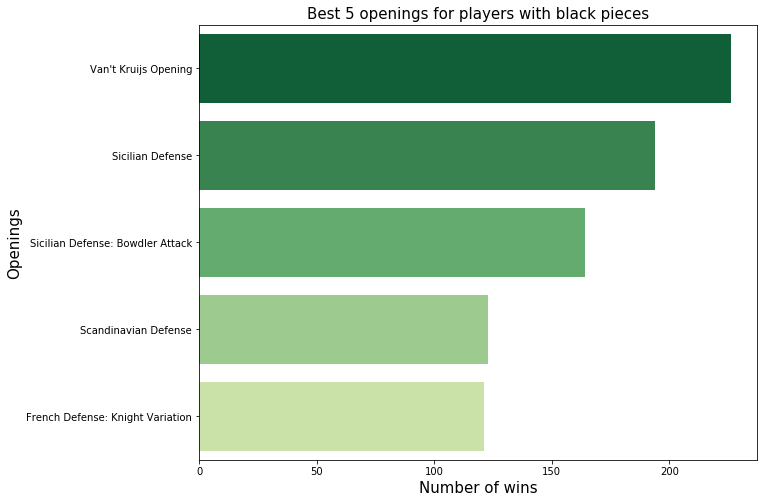

In [514]:
data_black = data2[data2["winner"] == "black"]
data_black = data_black.iloc[0:-1,]
plt.figure(figsize=(10, 8))
sns.barplot(data_black["counts"],data_black["opening_name"])
plt.ylabel("Openings",size = 15)
plt.xlabel("Number of wins",size = 15)
#plt.xticks(rotation = 10)
plt.title("Best 5 openings for players with black pieces",size = 15)

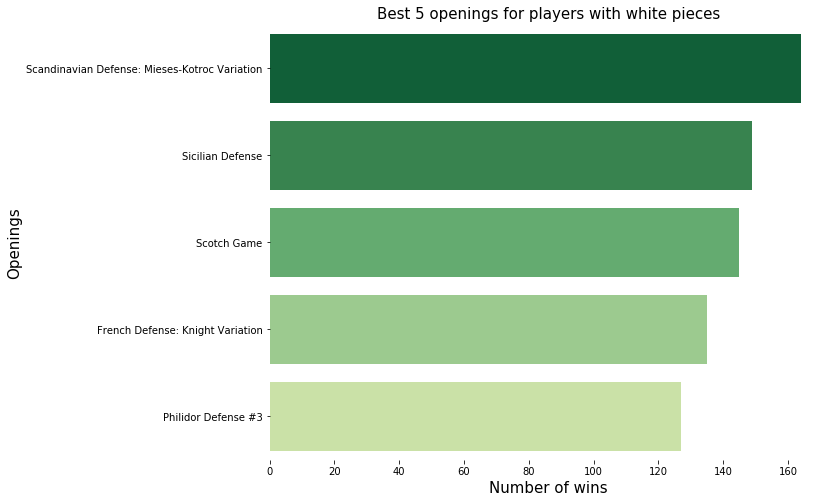

In [515]:
data_white = data2[data2["winner"] == "white"]
data_white = data_white.iloc[0:-3,]
plt.figure(figsize=(10, 8))
sns.barplot(data_white["counts"],data_white["opening_name"])
plt.ylabel("Openings",size = 15)
plt.xlabel("Number of wins",size = 15)
#plt.xticks(rotation = 10)
plt.title("Best 5 openings for players with white pieces",size = 15)
sns.despine(left=True, bottom=True)

We can see the best openings for players with black pieces and for players with white pieces separetly.

## Some other plots

In [516]:
data["time"] = (data["last_move_at"] - data["created_at"])
data["time"] = data["time"].dt.total_seconds()/60

Text(0.5, 1.0, 'Histogram of the duration of game')

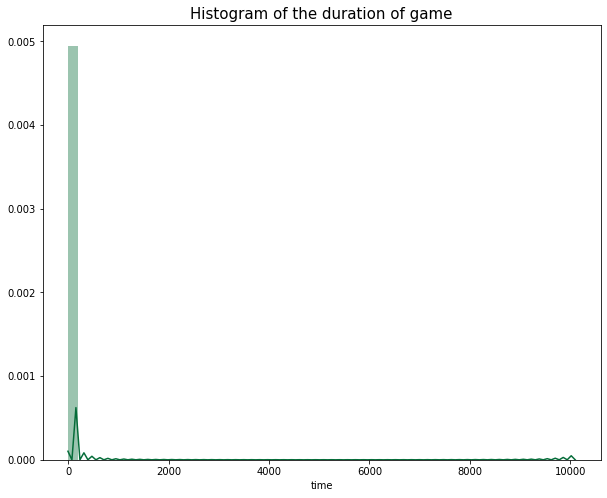

In [517]:
plt.figure(figsize=(10, 8))
sns.distplot(data["time"])
plt.title("Histogram of the duration of game",size = 15)

From this plot we can see that we have lots of games that have same start and end time, so I think its some issue of data, we can took the 0s, and than look to histogram. And will look to less than 1000 mins to see better.

Text(0.5, 1.0, 'Histogram of the duration of game')

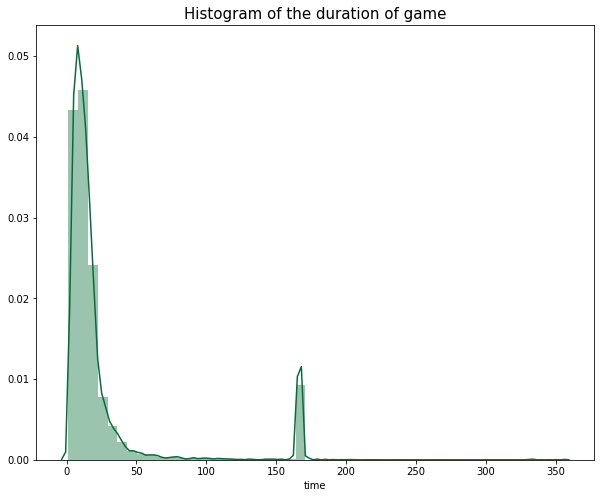

In [533]:
data9 = data[data["time"] >1]
data9 = data9[data9["time"] < 1000]
plt.figure(figsize=(10, 8))
sns.distplot(data9["time"])
plt.title("Histogram of the duration of game",size = 15)

In [519]:
data9["time"].describe()

count    11199.000000
mean        25.950791
std        105.990841
min          1.007267
25%          7.015633
50%         12.024317
75%         19.289475
max      10097.411683
Name: time, dtype: float64

As we have very high values also, it's normal that our histogram has this look, we also can see that we have large standart deviation, and the game in average lastat 12 minutes

Text(0.5, 1.0, 'Bar plot of Victory status')

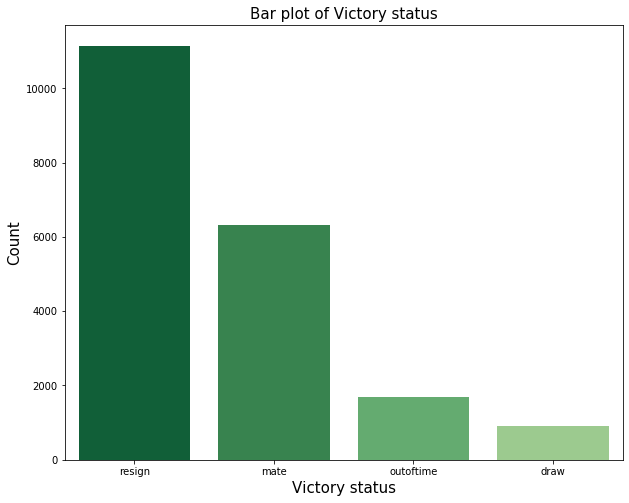

In [520]:
data4 = data.groupby(("victory_status")).size().reset_index(name='counts').nlargest(14,"counts")
plt.figure(figsize=(10, 8))
sns.barplot(data4["victory_status"],data4["counts"])
plt.xlabel("Victory status", size = 15)
plt.ylabel("Count",size = 15)
plt.title("Bar plot of Victory status",size = 15)

From this plot we can see that most of the games were ended with resign.

In [521]:
data5 = data.groupby(("winner","victory_status")).mean()['number_of_moves'].reset_index(name='Mean')
data5 = data5[data5["winner"] != "draw"]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Grouped Barplot')

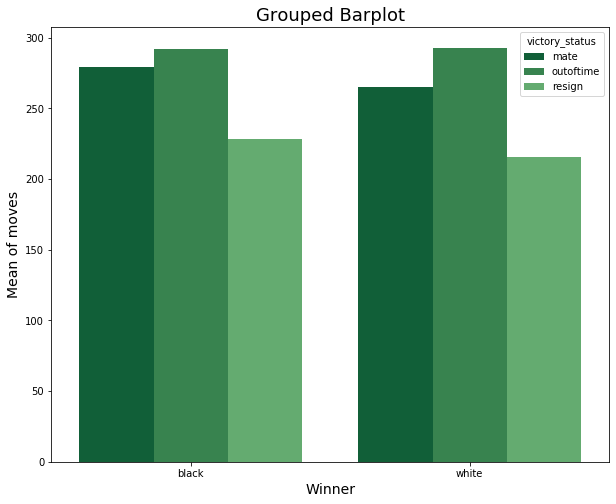

In [522]:
plt.figure(figsize=(10, 8))
sns.barplot(x="winner", 
            y="Mean", 
            hue="victory_status", 
            data=data5)
plt.ylabel("Mean of moves", size=14)
plt.xlabel("Winner", size=14)
plt.title("Grouped Barplot", size=18)

We can see the mean number of moves, for each Victory status and for each winner(black,white). That's meaningfull as the most number of moves have "outoftime" both for blacks and whites.

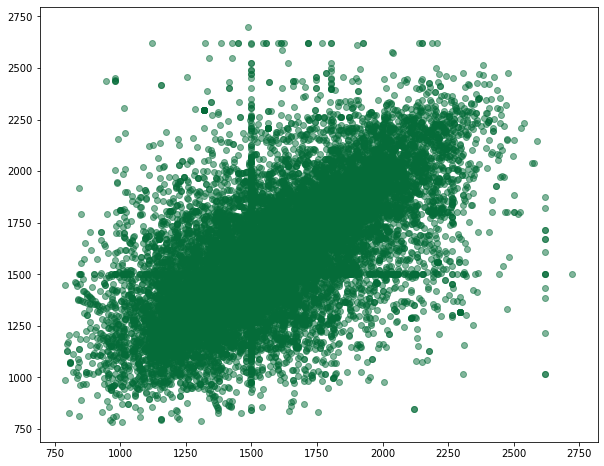

In [523]:
plt.figure(figsize=(10, 8))
plt.scatter(data["black_rating"], data["white_rating"], alpha=0.5)
plt.show()

From this plot we can say that there is no limitation for chess players, that high rated players should only play with high rated players.

In [524]:
data["first_move"] = data["moves"].str.split(' ').str[0]

Text(0.5, 1.0, 'Bar plot of First move')

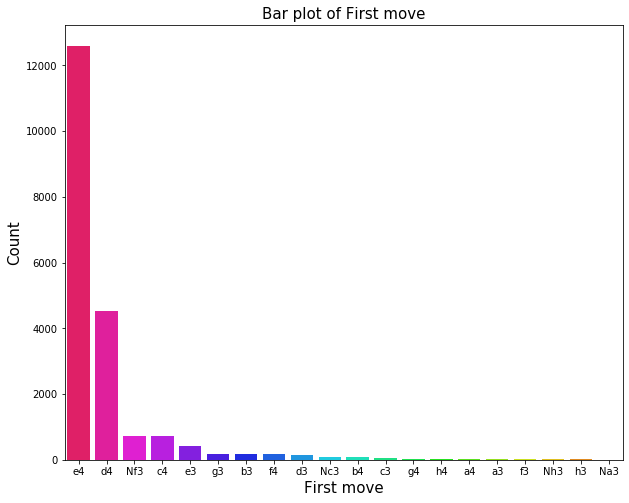

In [525]:
data6 = data.groupby("first_move").size().reset_index(name='counts').nlargest(50,"counts")
plt.figure(figsize=(10, 8))
sns.barplot(data6["first_move"],data6["counts"],palette = "hsv_r")
plt.xlabel("First move", size = 15)
plt.ylabel("Count",size = 15)
plt.title("Bar plot of First move",size = 15)

We can see that the huge amount of chess players start their game with pawn "E4"

In [526]:
data["moves"]

0        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
5                                         e4 c5 Nf3 Qa5 a3
6        d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...
7                           e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4
8        e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...
9        e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...
10       e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...
11       e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 Be3 Qxb2 Nbd2...
12       e4 e6 Nf3 d5 exd5 exd5 Qe2+ Be7 Nc3 Nf6 d4 O-O...
13       e4 e6 Qh5 g6 Qe5 Nf6 d4 d6 Qb5+ Bd7 Qxb7 Bc6 Q...
14       e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O d3 Ne8 B...
15       e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 Qe7 O-O Nxe4 Nxe4 h6...
16       e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O Ne1 d6 d.

In [527]:
data7 = data.groupby("opening_name").mean()['time'].reset_index(name='Average time for opening').nlargest(20,"Average time for opening")

Text(0.5, 1.0, 'The longest openings')

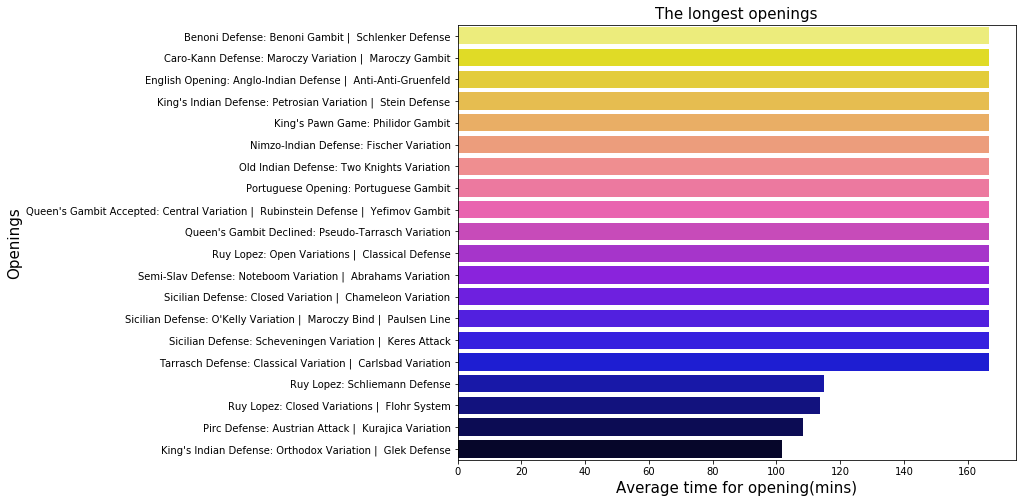

In [528]:
plt.figure(figsize=(10, 8))
sns.barplot(data7["Average time for opening"],data7["opening_name"],palette = "gnuplot2_r")
plt.ylabel("Openings",size = 15)
plt.xlabel("Average time for opening(mins)",size = 15)
plt.title("The longest openings",size = 15)

Here are shown the longest openings.

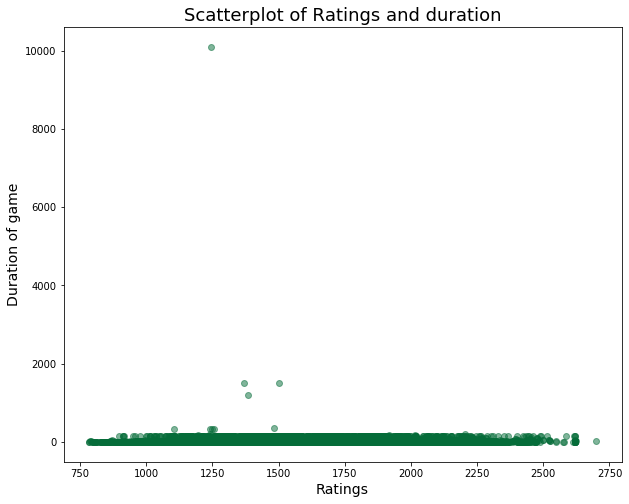

In [529]:
plt.figure(figsize=(10, 8))
plt.scatter(data["white_rating"], data["time"], alpha=0.5)
plt.ylabel("Duration of game", size=14)
plt.xlabel("Ratings", size=14)
plt.title("Scatterplot of Ratings and duration", size=18)
plt.show()

Here I want to see if there is any connection between rating and the time of game, but here we have some high values of time, so we can remove them to see the result. Will look now only that games whiche took less then 1000 minutes.

In [530]:
data10 = data[data["time"] < 1000]

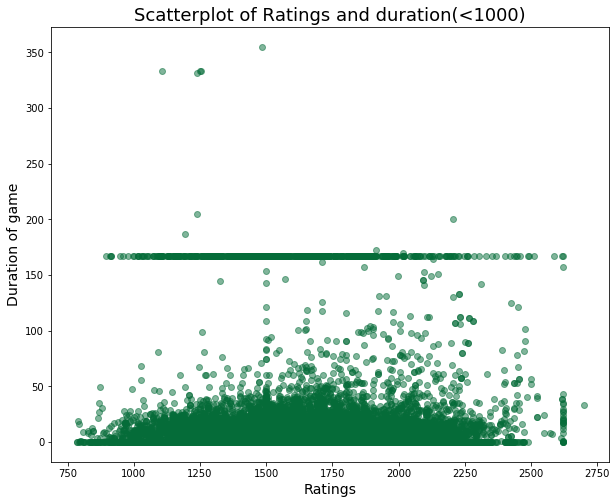

In [531]:
plt.figure(figsize=(10, 8))
plt.scatter(data10["white_rating"], data10["time"], alpha=0.5)
plt.ylabel("Duration of game", size=14)
plt.xlabel("Ratings", size=14)
plt.title("Scatterplot of Ratings and duration(<1000)", size=18)
plt.show()

So we can say that there is no connection between duration and rating.